In [65]:
# Import all the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import re
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB

In [141]:
df = pd.read_csv("./Desktop/indeed_job_dataset.csv")
df.head(10)

,Unnamed: 0,Job_Title,Link,Queried_Salary,Job_Type,Skill,No_of_Skills,Company,No_of_Reviews,No_of_Stars,Date_Since_Posted,Description,Location,Company_Revenue,Company_Employees,Company_Industry,python,sql,machine learning,r,hadoop,tableau,sas,spark,java,Others,CA,NY,VA,TX,MA,IL,WA,MD,DC,NC,Other_states,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance,Other_industries
0,0,Data Scientist,https://www.indeed.com/rc/clk?jk=6a105f495c36a...,<80000,data_scientist,"['SAP', 'SQL']",2,Express Scripts,3301.0,3.3,1.0,"[<p><b>POSITION SUMMARY</b></p>, <p>\r\r\nThe ...",MO,More than $10B (USD),"10,000+",Health Care,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,1,Data Scientist,https://www.indeed.com/rc/clk?jk=86afd561ea8c6...,<80000,data_scientist,"['Machine Learning', 'R', 'SAS', 'SQL', 'Python']",5,Money Mart Financial Services,NaN,NaN,15.0,"[<p><b>What do we need?</b></p>, <ul><li>\r\r\...",TX,NaN,NaN,NaN,1,1,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,Data Scientist,https://www.indeed.com/rc/clk?jk=e0aad317e6d45...,<80000,data_scientist,"['Data Mining', 'Data Management', 'R', 'SAS',...",9,comScore,62.0,3.5,1.0,"[<ul><li>Validate, analyze, and conduct statis...",OR,NaN,NaN,NaN,1,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,3,Graduate Studies Program - Data Scientist,https://www.indeed.com/rc/clk?jk=1cfdd9e391a63...,<80000,data_scientist,['Certified Internal Auditor'],1,Central Intelligence Agency,158.0,4.3,30.0,"[<p>Full time</p>, <p>Washington, DC metro are...",DC,NaN,NaN,Government,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,4,Data Scientist I,https://www.indeed.com/rc/clk?jk=fec647775a21e...,<80000,data_scientist,"['Statistical Software', 'Time Management', 'R...",7,Federal Reserve Bank of Dallas,495.0,4.1,30.0,[<ul><li>Assist in consultations with business...,TX,NaN,"Less than 10,000",Banks and Financial Services,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
5,5,Data Scientist - Entry to Experienced Level,https://www.indeed.com/rc/clk?jk=835a2db493898...,<80000,data_scientist,"['AI', 'Quantitative Analysis', 'Data Mining',...",6,National Security Agency,173.0,4.3,30.0,[<ul><li>Collecting and combining data from mu...,MD,NaN,NaN,NaN,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
6,6,Geospatial Data Scientist,https://www.indeed.com/rc/clk?jk=6255c4e94a7ef...,<80000,data_scientist,"['Statistical Software', 'Machine Learning', '...",10,NYC Careers,30.0,3.8,5.0,NaN,NY,NaN,NaN,Government,1,1,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7,7,Data Scientist,https://www.indeed.com/rc/clk?jk=f30ab3f52226b...,<80000,data_scientist,"['Machine Learning', 'R', 'SQL']",3,OM Partners,NaN,NaN,10.0,"[<p>With demand sensing, OM Partners is breaki...",GA,NaN,NaN,NaN,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
8,8,Bioinformatics Data Scientist,https://www.indeed.com/rc/clk?jk=a6e45b6264f26...,<80000,data_scientist,"['Linux', 'R', 'C/C++', 'Python']",4,University of Idaho,233.0,4.2,1.0,[<ul><li>Masters degree in Bioinformatics or t...,ID,NaN,NaN,Education and Schools,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
9,9,Data Scientist,https://www.indeed.com/rc/clk?jk=56090c965b57d...,<80000,data_scientist,"['JavaScript', 'Data Mining', 'TS/SCI Clearanc...",6,usajobs.gov,4227.0,4.3,22.0,"[<ul><div><h2 class=""jobSectionHeader""><b>Duti...",MO,NaN,"10,000+",Government,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [218]:
state_counts = df["Location"].value_counts()
df_test = state_counts.head(10)
df_test

CA     1395
NY      601
VA      334
TX      329
MA      271
nan     252
IL      240
WA      222
MD      169
DC      140
Name: Location, dtype: int64

In [144]:
# Calculate positions Percents
location_groupped = df.groupby(['Location'])
position_sum = location_groupped['Job_Type'].sum()

In [183]:
#cities and total no of openings w.r.t companies
city_and_roles=df.groupby(['Location','Company'])['Job_Type'].count()     
city_and_roles=city_and_roles.reset_index()
city_and_roles=city_and_roles.sort_values(['Job_Type'],ascending=False)
city_and_roles=city_and_roles.head(15) 

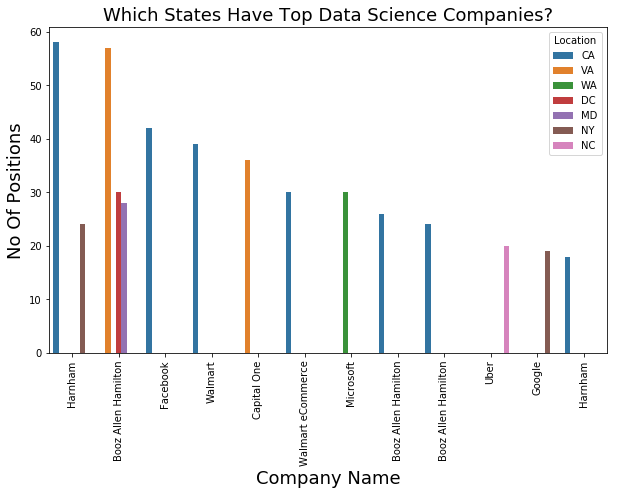

In [194]:
# Plot graph for top most cities and no of roles
fig,a = plt.subplots(figsize = (10,6))             
a = seaborn.barplot(x = "Company", y = "Job_Type", hue = "Location", data = city_and_roles);    
a.set_xticklabels(city_and_roles['Company'],rotation=90)   
a.set_ylabel('No Of Positions',fontsize=18)
a.set_title("Which States Have Top Data Science Companies?", fontsize=18)
a.set_xlabel('Company Name',fontsize=18)  

# Save Figure
plt.savefig("./Desktop/TopLocationsAndRoles.png")

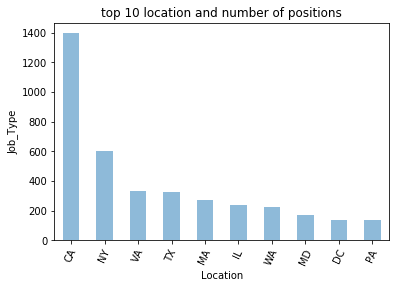

<Figure size 432x288 with 0 Axes>

In [149]:
# Create a bar chart based off of the group series from above
count_chart = df_test.plot(kind='bar',align="center", alpha=0.5, rot=65)

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Location")
count_chart.set_ylabel("Job_Type")
count_chart.set_title("top 10 location and number of positions")
location = location.head(10)
plt.show()

# Save Figure
plt.savefig("./Desktop/TopCities.png")

In [120]:
# set jupyter's max row display
pd.set_option('display.max_row', 1000)

# set jupyter's max column width to 50
pd.set_option('display.max_columns', 50)

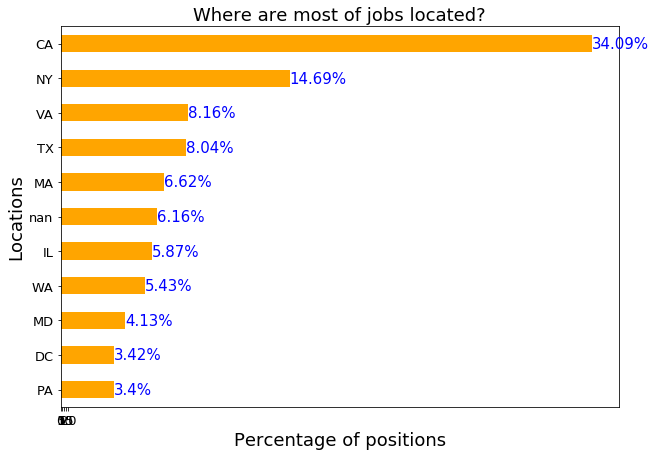

In [211]:
ax = df_test.plot(kind='barh', figsize=(10,7),
                                        color="orange", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Where are most of jobs located?", fontsize=18)
ax.set_xlabel("Percentage of positions", fontsize=18);
ax.set_ylabel("Locations", fontsize=18);
ax.set_xticks([0, 5, 10, 15, 20])

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=15,
color='blue')

# invert for largest on top 
ax.invert_yaxis()

# Save Figure
plt.savefig("./Desktop/JobsLocations.png")